<a href="https://colab.research.google.com/github/thunderdog101/database/blob/main/Copy_of_ML_inclass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from vega_datasets import data

In [ ]:
housing_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/housing.csv')

In [ ]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing_data.shape

(1460, 81)

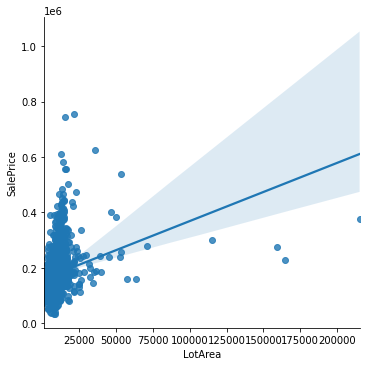

In [ ]:
sns.lmplot(y= 'SalePrice',
           x = 'LotArea',
           data = housing_data)

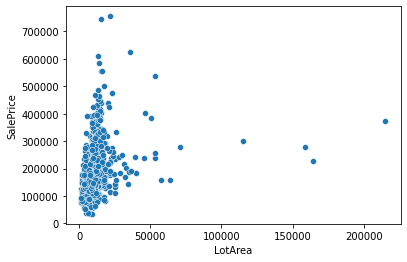

In [ ]:
sns.scatterplot(y= 'SalePrice',
           x = 'LotArea',
           data = housing_data)

In [ ]:
y=movies_data['Worldwide_Gross']
y

1064     18184083.0
1074    766812167.0
1090    456068181.0
1095     69791889.0
1107     32955399.0
           ...     
3158     43236603.0
3181     57604723.0
3183    225990976.0
3195     98690286.0
3196     36851125.0
Name: Worldwide_Gross, Length: 174, dtype: float64

In [ ]:
X = movies_data[['Production_Budget', 'IMDB_Rating']]
X

,Production_Budget,IMDB_Rating
1064,20000000.0,5.4
1074,200000000.0,6.2
1090,60000000.0,7.8
1095,48000000.0,7.9
1107,30000000.0,5.9
...,...,...
3158,6000000.0,8.2
3181,60000000.0,5.0
3183,50000000.0,7.0
3195,23600000.0,7.8


In [ ]:
X = sm.add_constant(X)
X

,const,Production_Budget,IMDB_Rating
1064,1.0,20000000.0,5.4
1074,1.0,200000000.0,6.2
1090,1.0,60000000.0,7.8
1095,1.0,48000000.0,7.9
1107,1.0,30000000.0,5.9
...,...,...,...
3158,1.0,6000000.0,8.2
3181,1.0,60000000.0,5.0
3183,1.0,50000000.0,7.0
3195,1.0,23600000.0,7.8


In [ ]:
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           4.91e-39
Time:                        23:24:59   Log-Likelihood:                -3510.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     171   BIC:                             7037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.267e+08   6.77e+0

# Dummies - Genre

In [ ]:
distrib_dummies = pd.get_dummies(movies_data[['Distributor']])
distrib_dummies

,Distributor_20th Century Fox,Distributor_Dreamworks SKG,Distributor_Focus Features,Distributor_Fox Searchlight,Distributor_Lionsgate,Distributor_MGM,Distributor_Miramax,Distributor_New Line,Distributor_Newmarket Films,Distributor_Overture Films,Distributor_Paramount Pictures,Distributor_Paramount Vantage,Distributor_Rocky Mountain Pictures,Distributor_Samuel Goldwyn Films,Distributor_Sony Pictures,Distributor_Sony Pictures Classics,Distributor_Sony/Screen Gems,Distributor_Summit Entertainment,Distributor_United Artists,Distributor_Universal,Distributor_Walt Disney Pictures,Distributor_Warner Bros.,Distributor_Weinstein Co.
1064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1095,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = X.join(distrib_dummies)
X

,const,Production_Budget,IMDB_Rating,Distributor_20th Century Fox,Distributor_Dreamworks SKG,Distributor_Focus Features,Distributor_Fox Searchlight,Distributor_Lionsgate,Distributor_MGM,Distributor_Miramax,Distributor_New Line,Distributor_Newmarket Films,Distributor_Overture Films,Distributor_Paramount Pictures,Distributor_Paramount Vantage,Distributor_Rocky Mountain Pictures,Distributor_Samuel Goldwyn Films,Distributor_Sony Pictures,Distributor_Sony Pictures Classics,Distributor_Sony/Screen Gems,Distributor_Summit Entertainment,Distributor_United Artists,Distributor_Universal,Distributor_Walt Disney Pictures,Distributor_Warner Bros.,Distributor_Weinstein Co.
1064,1.0,20000000.0,5.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1074,1.0,200000000.0,6.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1090,1.0,60000000.0,7.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1095,1.0,48000000.0,7.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1107,1.0,30000000.0,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1.0,6000000.0,8.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3181,1.0,60000000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3183,1.0,50000000.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3195,1.0,23600000.0,7.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     17.02
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.59e-31
Time:                        23:32:48   Log-Likelihood:                -3485.8
No. Observations:                 174   AIC:                             7022.
Df Residuals:                     149   BIC:                             7101.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co